In [35]:
#imports
import pandas as pd
import numpy as np
import requests
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
# Set Chrome options (optional)
chrome_options = Options()
# chrome_options.add_argument("--headless")  # Run browser in headless mode

# Initialize the Chrome WebDriver
driver = webdriver.Chrome(options=chrome_options)
#using selenium to launch and scroll through the Google Jobs page
url = "https://www.google.com/search?q=data+scientist+jobs+new+york+in+the+last+1+week"
driver.get(url)


In [36]:
from bs4 import BeautifulSoup
html_content = driver.page_source
soup = BeautifulSoup(html_content, 'html.parser')
page_text = soup.get_text()

In [37]:
jobsDiv = soup.find('div', attrs = {'class':'crJ18e'}).find_all("div")

In [38]:
def get_jobs_url(jobsDiv):
    for links in jobsDiv[1:]:
        if links.getText() == "Jobs":
            if len(links.find_all('a', href=True)) == 0:
                pass
            else:
                split_str = (str(links.find_all("a")[0]).split(" "))
                for st in split_str:
                    if "href" in st:
                        url = "https://www.google.com"+st.split('"')[1].replace("amp;","")
                        return url
                    else:
                        pass
    return ""

In [39]:
# driver.quit()
url = get_jobs_url(jobsDiv)
driver = webdriver.Chrome(options=chrome_options)
driver.get(url)
print(url)

https://www.google.com/search?sca_esv=a070f1a21c6d59ce&q=data+scientist+jobs+new+york+in+the+last+1+week&udm=8&fbs=AEQNm0Aa4sjWe7Rqy32pFwRj0UkWMsfQD7WCPyiYA6ksw1JggZiiKYT754MEbxpHmevMqD1TqahQSGkMlmB-a2LAltd1l19qFLyrE_uwfMSVXZ9siPqziIbo8YB_lOU8DCTSAZTvOMoESzoOAnhYsVjIfvWBdueqqVXvCVAZh5pITj9S0zFvl32q6YxS3bVLG6VvRBAI8wyk&sa=X&ved=2ahUKEwiNz5rlpZSKAxVnTWcHHQONMkwQs6gLegQILhAB


In [40]:
html_content = driver.page_source
soup = BeautifulSoup(html_content, 'html.parser')
div = soup.find_all('div', attrs = {'class':'EimVGf'})
len(div)

10

In [41]:
time.sleep(5)
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(2)
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(2)

In [8]:
html_content = driver.page_source
soup = BeautifulSoup(html_content, 'html.parser')
job_detail_div = soup.find_all('div', attrs = {'class':'EimVGf'})
len(div)

10

In [9]:
details_link = []
for div in job_detail_div:
    details_link.append(str(div.find_all("a")[0]).split(" ")[2].split('"')[1].replace("amp;",""))

In [10]:
def monitor_length_of_all_list(job_details_dict):
    lengthList = []
    for value in list(job_details_dict.values()):
        lengthList.append((len(value)))
    max_length = max(lengthList)
    for key in list(job_details_dict.keys()):
        if len(job_details_dict[key]) < max_length:
            job_details_dict[key].append("")
        else:
            pass
    return job_details_dict

In [11]:
job_details_dict = {"job_header":[],"job_sites":[],'Job highlights':[],'Qualifications':[],'Benefits':[],'Responsibilities':[],'Job description':[]}
for idx,link in enumerate(details_link[:10]):
    driver = webdriver.Chrome(options=chrome_options)
    driver.get(link)
    time.sleep(5)
    html_content = driver.page_source
    soup = BeautifulSoup(html_content, 'html.parser')
    job_header = soup.find('div', attrs = {'class':'JmvMcb'}).get_text(separator="@@@###@@@").split("@@@###@@@")
    print("{}) {}".format(idx,job_header[0]))
    job_sites = soup.find('div', attrs = {'class':'gwBWYe'}).get_text(separator="@@@###@@@").split("@@@###@@@")
    job_details_header = soup.find('div', attrs = {'class':'NgUYpe'})
    job_details_header = [i.get_text() for i in job_details_header.find_all(["h1","h2","h3","h4","h5"])]
    job_details_text = soup.find('div', attrs = {'class':'NgUYpe'}).get_text(separator="@@@###@@@").replace("@@@###@@@","\n")
    for i in job_details_header:
        job_details_text = job_details_text.replace(i,"<###HEADER###>",1)
    job_details_dict["job_header"].append(job_header)
    job_details_dict["job_sites"].append(job_sites)
    sep = job_details_text.split("<###HEADER###>")[1:]
    for s,j in zip(sep,job_details_header):
        if j in list(job_details_dict.keys()):
            job_details_dict[j].append(s)
        # else:
        #     job_details_dict[j] = [s]
    job_details_dict = monitor_length_of_all_list(job_details_dict)
driver.quit()

0) Data Analytics Engineering Graduate Internship - Summer 2025
1) Data Analytics Engineering Graduate Internship - Summer 2025
2) Data Analytics Engineering Graduate Internship - Summer 2025
3) Summer Internship Program 2025 - Data Analyst, Data Science and Visualization Intern
4) Data Science Graduate Internship - Summer 2025
5) Associate data science
6) Business Data Scientist Intern, PhD, Summer 2025
7) 2025 PhD Graduate - AI/ML Data Scientist/Engineer - Analytic Capabilities
8) 2025 Summer Intern: Associate Data Scientist
9) 2025 Summer Internship Program - Data Scientist - Internal Consulting


In [12]:
job_details_header

['Job highlights',
 'Qualifications',
 'Benefits',
 'Responsibilities',
 'Job description']

In [13]:
job_details_dict

{'job_header': [['Data Analytics Engineering Graduate Internship - Summer 2025',
   'CVS Health • New York, NY •  via LinkedIn',
   '17 hours ago',
   'Full-time',
   'Health insurance'],
  ['Data Analytics Engineering Graduate Internship - Summer 2025',
   'CVS Health • New York, NY •  via LinkedIn',
   '17 hours ago',
   'Full-time',
   'Health insurance'],
  ['Data Analytics Engineering Graduate Internship - Summer 2025',
   'CVS Health • New York, NY •  via LinkedIn',
   '17 hours ago',
   'Full-time',
   'Health insurance'],
  ['Summer Internship Program 2025 - Data Analyst, Data Science and Visualization Intern',
   'ICE • New York, NY •  via LinkedIn',
   '2 days ago',
   'Internship'],
  ['Data Science Graduate Internship - Summer 2025',
   'CVS Health • New York, NY •  via CVS Health',
   '5 days ago',
   'Full-time',
   'Health insurance'],
  ['Associate data science',
   'JPMorgan Chase Bank, N.A. • New York, NY •  via Talent.com',
   '4 days ago',
   '135K–155K a year',
   

In [14]:
for value in list(job_details_dict.values()):
    print(len(value))

10
10
10
10
10
10
10


In [21]:
df = pd.DataFrame(job_details_dict)

In [36]:
df.head()

,job_header,job_sites,Job highlights,Qualifications,Benefits,Responsibilities,Job description
0,[Data Analytics Engineering Graduate Internshi...,"[Apply on LinkedIn , Apply on Orion Talent ,...",Identified by Google from the original job post,\nMeet educational requirements (see Education...,\nWe offer challenging opportunities for you t...,\nYou will be aligned to projects to lead or c...,\nYou’ve invested a lot of time and energy in ...
1,[Data Analytics Engineering Graduate Internshi...,"[Apply on LinkedIn , Apply on Orion Talent ,...",Identified by Google from the original job post,\nMeet educational requirements (see Education...,\nWe offer challenging opportunities for you t...,\nYou will be aligned to projects to lead or c...,\nYou’ve invested a lot of time and energy in ...
2,[Data Analytics Engineering Graduate Internshi...,"[Apply on LinkedIn , Apply on Orion Talent ,...",Identified by Google from the original job post,\nMeet educational requirements (see Education...,\nWe offer challenging opportunities for you t...,\nYou will be aligned to projects to lead or c...,\nYou’ve invested a lot of time and energy in ...
3,[Summer Internship Program 2025 - Data Analyst...,"[Apply on LinkedIn , Apply on Diversity Jobs ...",Identified by Google from the original job post,\nCurrently enrolled in a degree program at an...,\nThe expected hourly rate for this role is $3...,\nYou’ll have the chance to build meaningful p...,\nOverview\nJob Purpose\nThe ICE Internship Pr...
4,[Data Science Graduate Internship - Summer 202...,"[Apply on CVS Health , Apply on ZipRecruiter ...",Identified by Google from the original job post,\nMeet educational requirements (see Education...,\nWe offer challenging opportunities for you t...,\nYou will be aligned to projects to lead or c...,\nYou’ve invested a lot of time and energy in ...


['job_header',
 'job_sites',
 'Job highlights',
 'Qualifications',
 'Benefits',
 'Responsibilities',
 'Job description']

In [49]:
for column in df.columns.tolist():
    if isinstance(df[column][0],list):
        continue
    df[column] = [i.replace("\n","") for i in list(df[column])]

In [50]:
df.to_csv("jobs.csv")



In [16]:

job_details_header

['Job highlights',
 'Qualifications',
 'Benefits',
 'Responsibilities',
 'Job description']

In [17]:
all_tags = soup.find_all(["h1","h2","h3","h4","h5","ul","li","p"])

In [18]:
for t in all_tags:
    print(t.get_text())

Accessibility Links

Delete
See more

Delete

Filters and Topics
Search settings
Search Results
Footer Links
2025 Summer Internship Program - Data Scientist - Internal Consulting
Job highlights
Qualifications
is graduating between December 2025 and June 2026 and has a cumulative GPA of 3.0 and abovehas experience working in a project-based environmenthas values that align with ours: hard-working, trustworthy, dedicated and collaborativeis a strategic thinker with strong communication skillsis motivated to work in a business with high demands and tight deadlinesWe’re looking for someone who’s curious and wants to thrive in a business that never stops moving3 more items(s)
is graduating between December 2025 and June 2026 and has a cumulative GPA of 3.0 and above
has experience working in a project-based environment
has values that align with ours: hard-working, trustworthy, dedicated and collaborative
is a strategic thinker with strong communication skills
is motivated to work in a busi

[<a href="/search?q=2025+graduate+data+scientist+jobs+new+york+in+the+last+1+week&amp;sa=X&amp;sca_esv=2c272caab9e83ec0&amp;udm=8&amp;gbv=1&amp;sei=-kYxZ4LwCYX-ptQPgebg6Q0">here</a>,
 <a class="gyPpGe" data-ved="0ahUKEwiC1ZrK-tKJAxUFv4kEHQEzON0Q67oDCAU" jsaction="i3viod" jsname="BKxS1e" role="link" tabindex="0">Skip to main content</a>,
 <a class="gyPpGe" href="https://support.google.com/websearch/answer/181196?hl=en" jsname="KI37ad" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://support.google.com/websearch/answer/181196%3Fhl%3Den&amp;ved=0ahUKEwiC1ZrK-tKJAxUFv4kEHQEzON0QwcMDCAY&amp;opi=89978449">Accessibility help</a>,
 <a class="gyPpGe" data-async-trigger="duf3-78" jsaction="trigger.szjOR" jsname="JUypV" role="link" tabindex="0">Accessibility feedback</a>,
 <a data-hveid="8" href="https://www.google.com/webhp?hl=en&amp;sa=X&amp;ved=0ahUKEwiC1ZrK-tKJAxUFv4kEHQEzON0QPAgI" id="logo" title="Go to Google Home"><svg height="30" viewbox="0 0 92 30" width="92" xmlns="http://www.w3
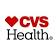
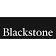
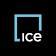
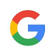
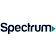
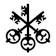

In [19]:
soup.find_all("a")

In [42]:
s = "can you explain me"
s.split("you")

['can ', ' explain me']